In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from yellowbrick.cluster import KElbowVisualizer

# Read CSV and Data Types

In [4]:
col_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

df_iris = pd.read_csv('../datasets/iris.data', header=None, names=col_names)
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
df_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Visualização dos Dados

In [6]:
def numerical_distribution (colnumber, plot_type='histogram', data=df_iris):  
    if plot_type=='histogram':
        
        # x label for the histogram
        plt.xlabel(data.columns[colnumber])
    
        # y label for the histogram (-1 points to the last column of the set)
        plt.ylabel('Frequency')
    
        # title for the histogram
        plt.title(data.columns[colnumber] + ' distribution')
    
        # histogram
        data.iloc[:,colnumber].plot.hist()
        
    elif plot_type=='boxplot':
    
        # setting type of plot
        sns.set_theme(style="ticks", color_codes=True)
    
        # setting what values we plot
        sns.catplot(x=data.columns[-1], y=data.columns[colnumber], kind='box',data=data);
    
        # title
        plt.title(data.columns[colnumber] + ' distribution depending on ' + data.columns[-1])

In [7]:
df_iris['species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

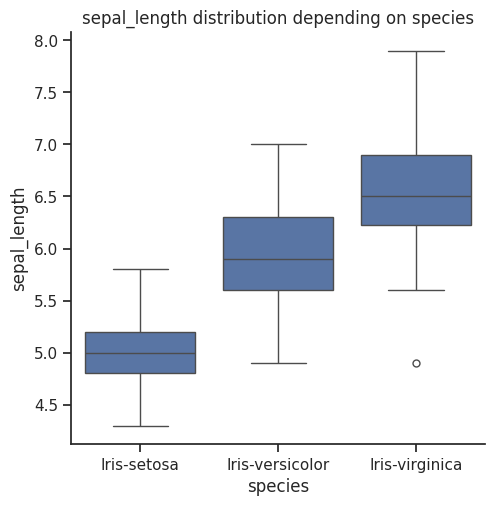

In [8]:
numerical_distribution(0,'boxplot')

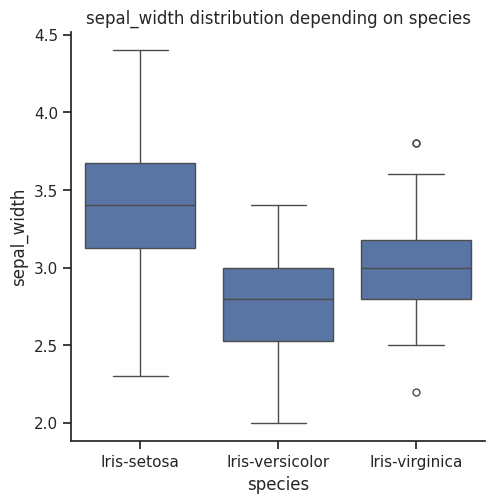

In [9]:
numerical_distribution(1,'boxplot')

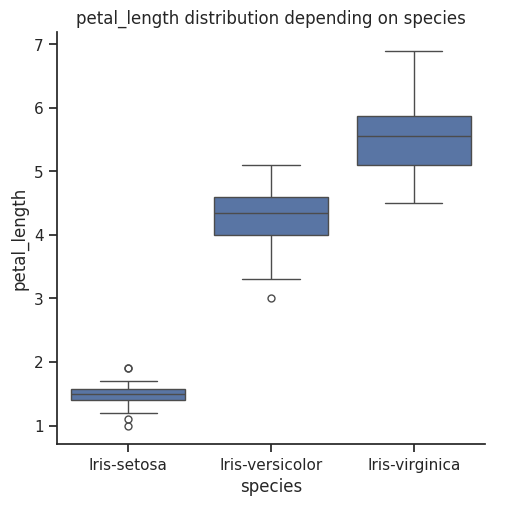

In [10]:
numerical_distribution(2,'boxplot')

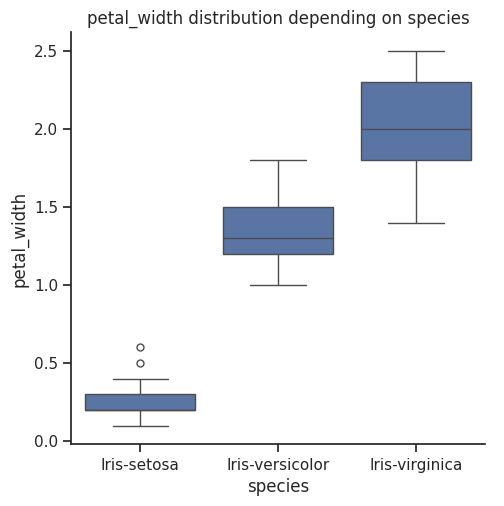

In [11]:
numerical_distribution(3,'boxplot')

# Engenharia de Recursos

In [12]:
# Remove o atributo alvo
df = df_iris.drop('species', axis=1)

In [15]:
#normalizar os atributos contínuos com MinMaxScaler()
mms = MinMaxScaler()
mms.fit(df)

df_transformed = mms.transform(df)
df_transformed = pd.DataFrame(df_transformed)
df_transformed.head()

,0,1,2,3
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667



# Determinação do melhor número de grupos usando a soma quadrática das distâncias como índice interno (Método do “cotovelo”)

## Agrupar variando o número de grupos


Aplicar o algoritmo k-means no conjunto de dados (sem a classe) para todos os valores do intervalo definido e armazenar o valor do índice soma quadrática das distâncias para todos os agrupamentos encontrados usando o atributo inertia_ do algoritmo Kmeans do Python;

In [16]:
K = range(1,15)

Sum_of_squared_distances = []
for k in K:
    km = KMeans(n_clusters=k,n_init=10)
    km = km.fit(df_transformed)
    Sum_of_squared_distances.append(km.inertia_)

Plota o gráfico dos índices encontrados para cada número de grupos e determinar qual é o melhor de acordo com o método do cotovelo explicado na aula.
De acordo com o método, o melhor números de grupos são 3

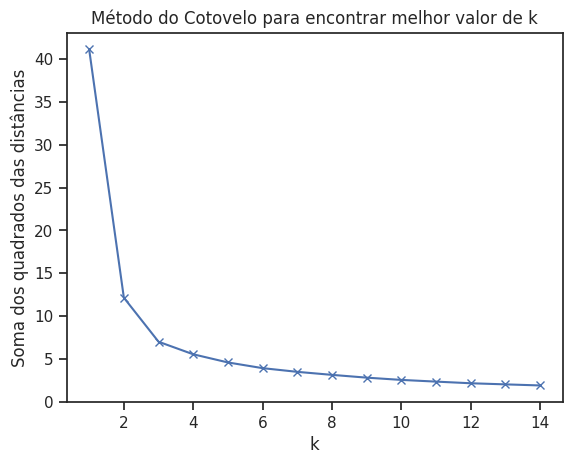

In [17]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Soma dos quadrados das distâncias')
plt.title('Método do Cotovelo para encontrar melhor valor de k')
plt.show()

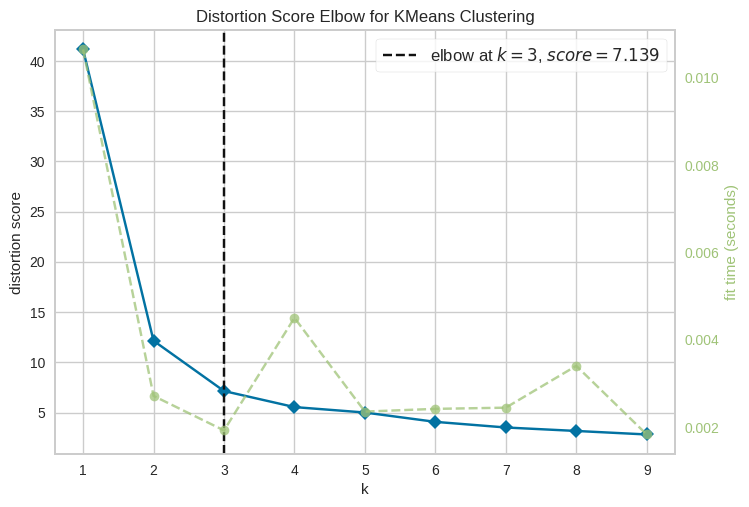

In [19]:
model = KMeans(random_state=42)
visualizer = KElbowVisualizer(model, k=(1,10))
visualizer.fit(df_transformed)
visualizer.show();

In [20]:
X = df_iris.iloc[:,:-1]
y = df_iris.iloc[:,-1]

In [25]:
kmeans = KMeans(n_clusters = 3 , 
                init = 'k-means++', 
                max_iter = 300, 
                n_init = 10, 
                random_state = 0)
# fitting the model
y_kmeans = kmeans.fit_predict(X)

In [26]:
pd.crosstab(y_kmeans, y)

species,Iris-setosa,Iris-versicolor,Iris-virginica
row_0,,,
0,0,48,14
1,50,0,0
2,0,2,36
